## NJSLA Spring 25 MATH  Analysis SPED

Analysis of the MATH results of SPED for the Spring 25 NJSLA. This analysis seeks to analyze testing results based on the student's **[Special Eeducation Placement](https://www.nj.gov/education/sleds/resources/specialed/doc/NJSLEDS_Special-Education_Handbook.pdf)**, the percentage of their
r academic day spent with their general education peers per their IEP documentation.



In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importing dataset
df_math = pd.read_excel(r"S:\ASSESSMENTS\NJSLA 2025\NJSLA 2025 ELA Math Summative Record File.xlsx")

In [3]:
# filtering to return ELA TestCodes
df_math = df_math[df_math['TestCode'].isin(['ALG01','ALG02','MAT03', 'MAT04', 'MAT05', 'MAT06','MAT07', 'MAT08'])]

In [4]:
#filtering for valid test attempts
df_math = df_math[df_math['TestStatus']=='Attempt']

In [5]:
subject = 'MATH'

In [6]:
df_math.shape

(2893, 205)

In [7]:
# test code QA
df_math['TestCode'].unique()

array(['ALG01', 'ALG02', 'MAT07', 'MAT06', 'MAT08', 'MAT05', 'MAT04',
       'MAT03'], dtype=object)

In [8]:
# min and max scale scores by test performance level
df_math.groupby('TestPerformanceLevel')['TestScaleScore'].agg(['min','max'])

,min,max
TestPerformanceLevel,,
1.0,650.0,699.0
2.0,700.0,724.0
3.0,725.0,749.0
4.0,750.0,805.0
5.0,786.0,850.0


In [9]:
# function for proficiency
def proficient (row):
    if row['TestScaleScore'] >= 750:
        return 1
    elif row['TestScaleScore'] < 750:
        return 0

df_math['proficient'] = df_math.apply(proficient, axis = 1)

### Overall Proficiency

In [10]:
# Test performance level metrics
overall_performance_levels = df_math['TestPerformanceLevel'].value_counts(normalize = True)
overall_performance_levels = overall_performance_levels.reset_index()
overall_performance_levels = overall_performance_levels.sort_values(by = 'TestPerformanceLevel').reset_index(drop = True)

#overall proficiency
overall_proficiency = pd.DataFrame({'Outcome':'Proficient','Proficiency %':df_math['proficient'].mean()}, index = [0])

In [11]:
overall_performance_levels

,TestPerformanceLevel,proportion
0,1.0,0.021830
1,2.0,0.048510
2,3.0,0.146916
3,4.0,0.526334
4,5.0,0.256410


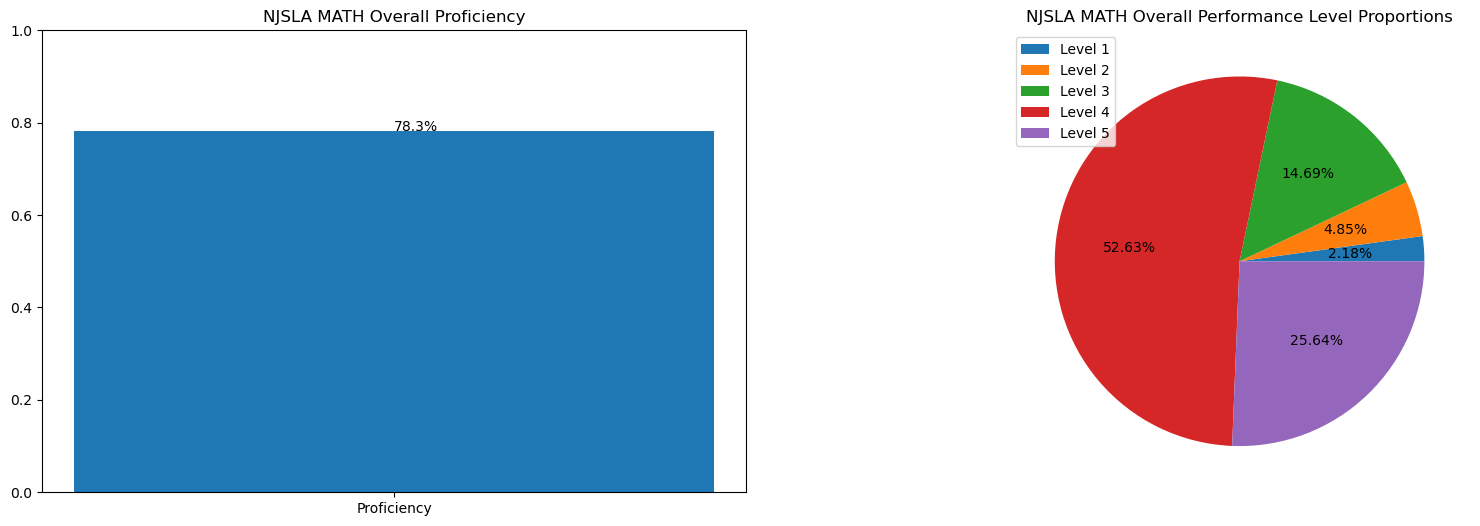

In [12]:
# plotting data
fig,ax = plt.subplots(nrows = 1, ncols =2, figsize = (20,6))
ax[1].pie (x = 'proportion', data = overall_performance_levels, autopct = '%1.2f%%' )
ax[0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = overall_proficiency)

#labeling
ax[0].set_title(f"NJSLA {subject} Overall Proficiency")
ax[1].set_title(f"NJSLA {subject} Overall Performance Level Proportions")
ax[1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')
ax[0].set_ylim(0,1)#--> setting y axis limit

for i,v in enumerate(overall_proficiency['Proficiency %']):
    ax[0].text(i,v,f"{v:.1%}")

plt.show()

### Proficiency Comparision **Non-IEP** and **IEP** 

In [13]:
# proficiency excluding IEP
gen_ed_test_performance = df_math[df_math['StudentWithDisabilities']!= 'IEP']['TestPerformanceLevel'].value_counts(normalize = True)
gen_ed_test_performance = gen_ed_test_performance.reset_index()
gen_ed_test_performance = gen_ed_test_performance.sort_values(by = 'TestPerformanceLevel').reset_index(drop = True)

# proficiency excluding IEP
gen_ed_proficiency = pd.DataFrame({'Outcome':'Non-IEP Proficient',
                                   'Proficiency %':df_math[df_math['StudentWithDisabilities']!= 'IEP']['proficient'].mean()}, index = [0])


# proficiency exclusively IEP
iep_test_performance = df_math[df_math['StudentWithDisabilities']=='IEP']['TestPerformanceLevel'].value_counts(normalize = True)
iep_test_performance = iep_test_performance.reset_index()
iep_test_performance = iep_test_performance.sort_values(by = 'TestPerformanceLevel' ).reset_index()

# proficiency exclusively IEP
iep_proficiency = pd.DataFrame({'Outcome':'Non-IEP Proficient',
                                 'Proficiency %':df_math[df_math['StudentWithDisabilities']== 'IEP']['proficient'].mean()}, index = [0])


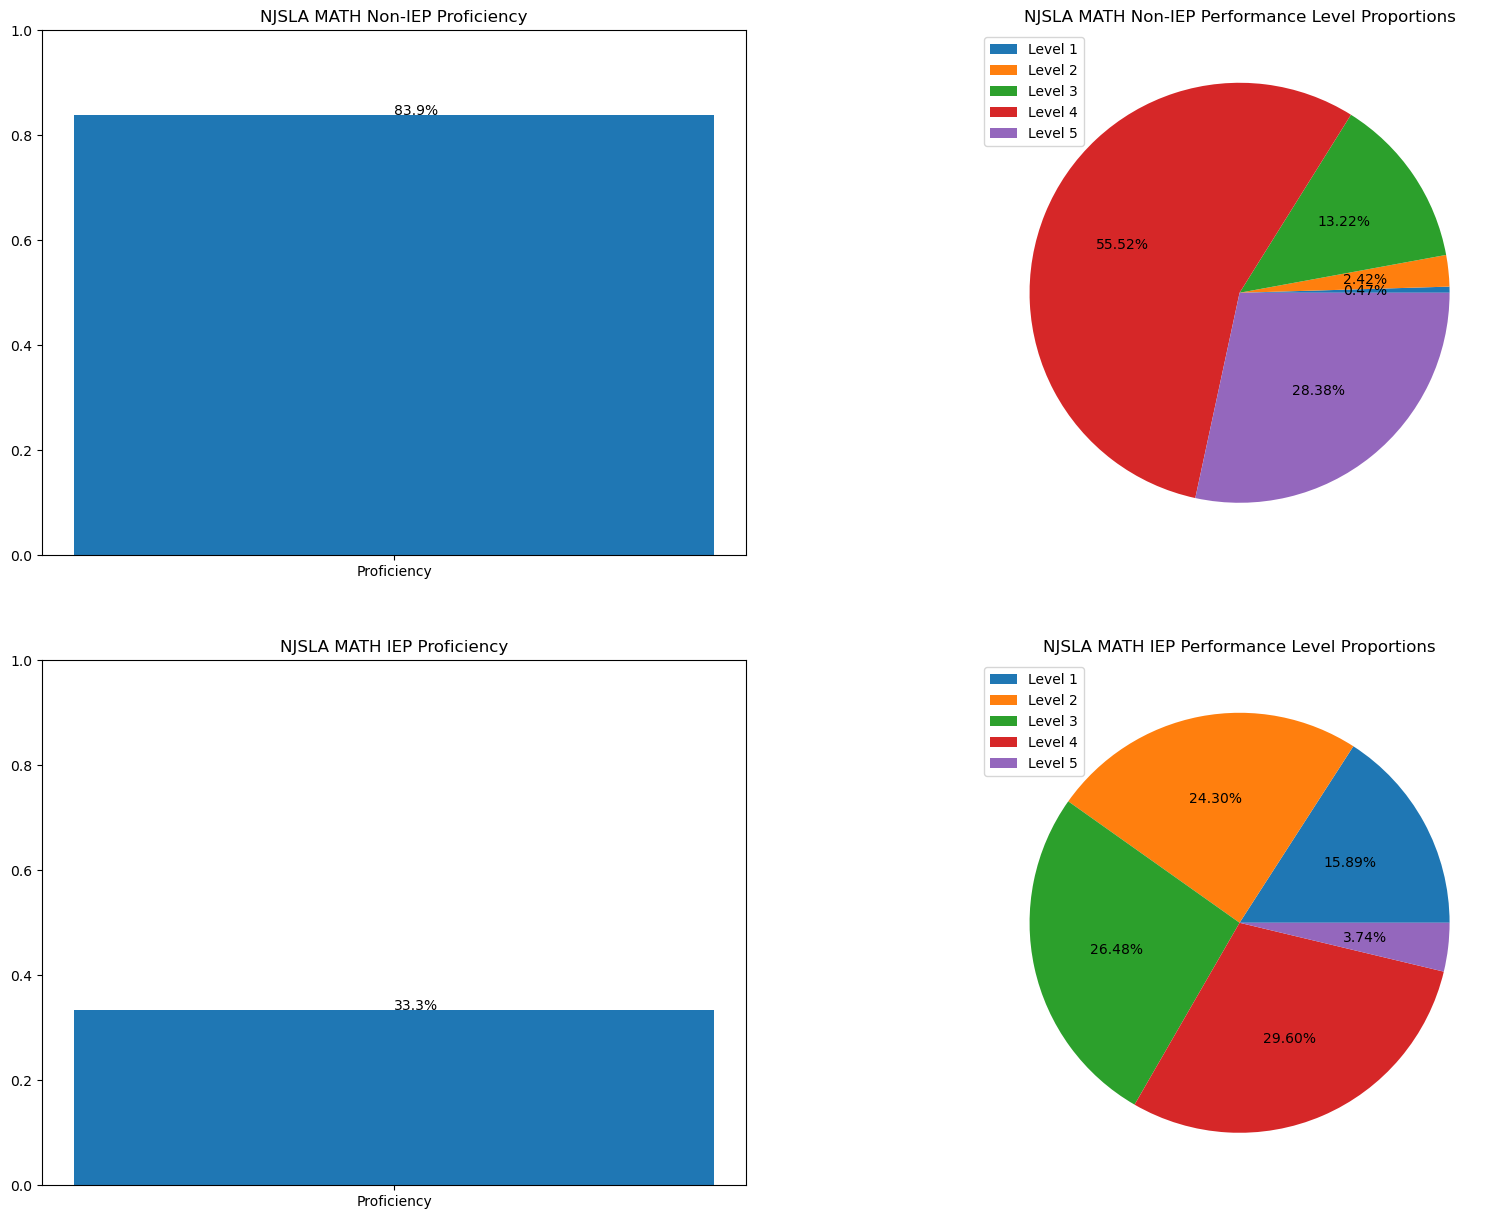

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

# plotting Non-IEP data
ax[0,1].pie (x = 'proportion', data = gen_ed_test_performance, autopct = '%1.2f%%' )
ax[0,0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = gen_ed_proficiency)


# labeling
ax[0,0].set_title(f"NJSLA {subject} Non-IEP Proficiency")
ax[0,1].set_title(f"NJSLA {subject} Non-IEP Performance Level Proportions")

ax[0,0].set_ylim(0,1)
for i,v in enumerate(gen_ed_proficiency['Proficiency %']):
    ax[0,0].text(i,v,f"{v:.1%}")

ax[0,1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')


# plotting IEP data
ax[1,1].pie (x = 'proportion', data = iep_test_performance, autopct = '%1.2f%%' )
ax[1,0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = iep_proficiency)


# labeling
ax[1,0].set_title(f"NJSLA {subject} IEP Proficiency")
ax[1,1].set_title(f"NJSLA {subject} IEP Performance Level Proportions")

ax[1,0].set_ylim(0,1)
for i,v in enumerate(iep_proficiency['Proficiency %']):
    ax[1,0].text(i,v,f"{v:.1%}")

ax[1,1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')


plt.show()


## Test Scale Score Distribution

In [15]:
df_math['TestScaleScore'].describe()   

count    2886.000000
mean      773.740471
std        33.304064
min       650.000000
25%       754.000000
50%       774.000000
75%       794.000000
max       850.000000
Name: TestScaleScore, dtype: float64

In [16]:
# statistical metrics
mean = df_math['TestScaleScore'].mean()
median = df_math['TestScaleScore'].median()
q3 = df_math['TestScaleScore'].quantile(.75) #--> 75th percentile
q1 = df_math['TestScaleScore'].quantile(.25) #--> 25th percentile
iqr = q3-q1 # IQR

# finding outliers
outlier_upper = q3 + (1.5 * iqr) 
outlier_lower = q1 - (1.5 * iqr)

print(f"An outlier on the NJSLA in {subject} is a Test Scale Score less than or equal to {outlier_lower}",
      f"There are {df_math[df_math['TestScaleScore']<= outlier_lower].shape[0]} outliers in the dataset.")

An outlier on the NJSLA in MATH is a Test Scale Score less than or equal to 694.0 There are 47 outliers in the dataset.


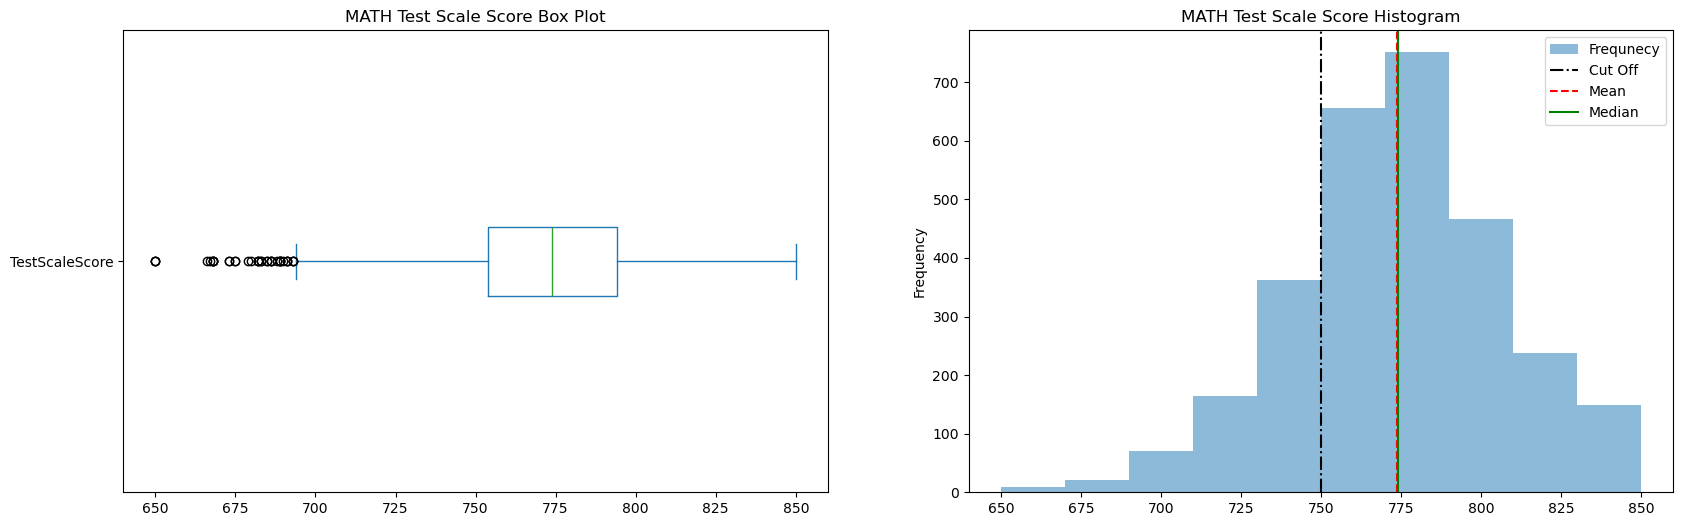

In [17]:
# plotting Test Scale Score Distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

df_math['TestScaleScore'].plot(kind = 'box', vert = False, title = f'{subject} Test Scale Score Box Plot', ax = ax[0])
df_math['TestScaleScore'].plot(kind = 'hist', title = f'{subject} Test Scale Score Histogram', ax = ax[1], alpha = .5)

ax[1].axvline(x = 750, linestyle = '-.', color = 'black')
ax[1].axvline(x = mean, linestyle = '--', color = 'red')
ax[1].axvline(x = median, linestyle = '-', color = 'green')

plt.legend(['Frequnecy','Cut Off','Mean','Median'])

plt.show()

#### Outliers

In [18]:
outliers = df_math[df_math['TestScaleScore']<= outlier_lower]

outliers['TestScaleScore'].describe()

count     47.000000
mean     682.468085
std       12.344425
min      650.000000
25%      675.000000
50%      686.000000
75%      693.000000
max      694.000000
Name: TestScaleScore, dtype: float64

In [19]:
# creating outliers dataframe
outliers_ct = outliers['StudentWithDisabilities'].value_counts().reset_index()

In [20]:
print(f"There were {outliers.shape[0]} outliers in the dataset, {outliers_ct['count'][0]} have an IEP.")

There were 47 outliers in the dataset, 39 have an IEP.


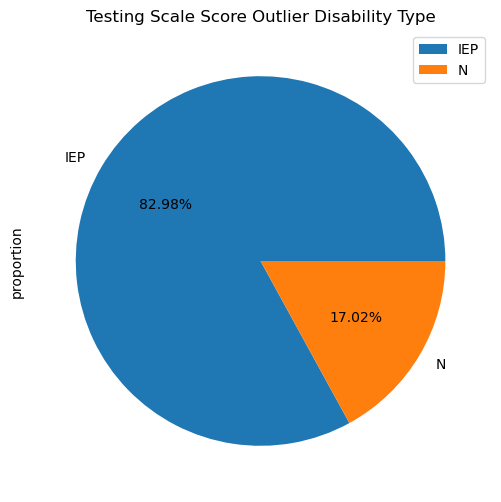

In [21]:
outliers['StudentWithDisabilities'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.2f%%', figsize = (10,6))
plt.title('Testing Scale Score Outlier Disability Type')
plt.legend()
plt.show()

In [22]:
# creating dataframe 
dis_type_count = outliers[outliers['StudentWithDisabilities']=='IEP']['PrimaryDisabilityType'].value_counts().reset_index()

# displaying count of disability type
dis_type_count

,PrimaryDisabilityType,count
0,SLD,12
1,OHI,10
2,SLI,7
3,AUT,6
4,ID,3
5,EMN,1


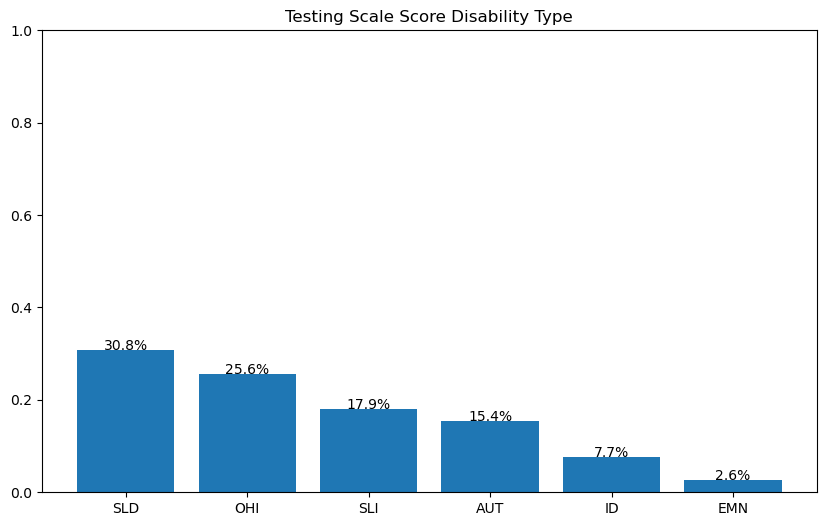

In [23]:
# creating data frame
dis_type = outliers[outliers['StudentWithDisabilities']=='IEP']['PrimaryDisabilityType'].value_counts(normalize = True).reset_index()

# plotting data
plt.figure(figsize = (10,6) )#--> creating figure
plt.bar( x = 'PrimaryDisabilityType', height = 'proportion', data = dis_type) #--> plotting bar graph

# applying labels
for i,v in enumerate(dis_type['proportion']):
    plt.text(i,v,f"{v:.1%}", ha = 'center')
plt.ylim([0,1]) #--> y-axis scale

plt.title('Testing Scale Score Disability Type')

plt.show()

In [24]:
iep_gen_comp = df_math[(df_math['StudentWithDisabilities'] == 'N')|(df_math['StudentWithDisabilities'] == 'IEP')].groupby('StudentWithDisabilities')['TestScaleScore'].median().reset_index()
iep_gen_comp.rename(columns = {'TestScaleScore':'Median Test Scale Score'}, inplace = True)
iep_gen_comp = iep_gen_comp.sort_values(by = 'Median Test Scale Score', ascending = False).reset_index(drop = True)

#### IEP Non IEP Comparison

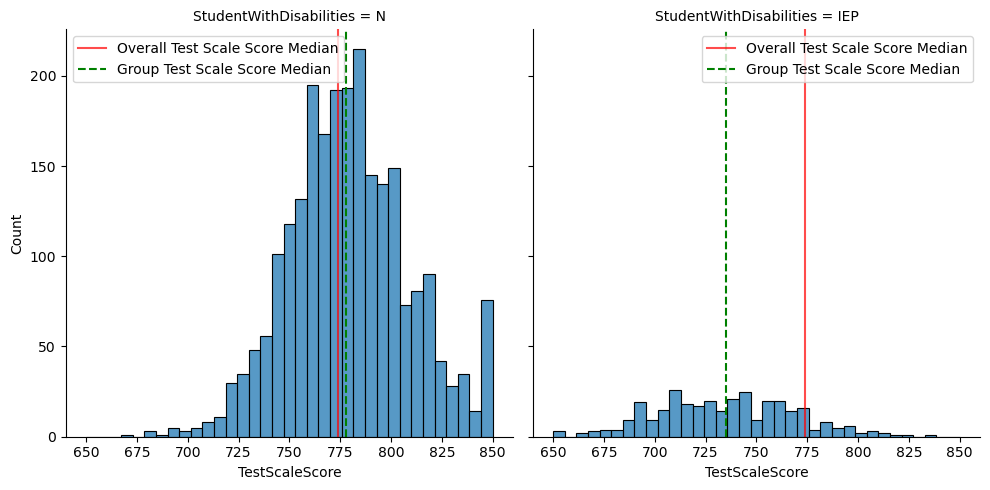

In [25]:
# Testing Scale Score Distribution by Disability

# creating plot object
plot = sns.displot(data = df_math[(df_math['StudentWithDisabilities'] == 'N')|(df_math['StudentWithDisabilities'] == 'IEP')] , x = 'TestScaleScore',col = 'StudentWithDisabilities',col_wrap = 2,kind = 'hist')

# creating axes object
axes = plot.axes.flatten()

# using for loop to plot median testing time line on each graph
for ax in axes:
    ax.axvline(x = median, color = 'red', label = 'Overall Test Scale Score Median', alpha = .7)
    ax.legend()

#using for loop to plot group median in each plot
for i, group_median in enumerate(iep_gen_comp['Median Test Scale Score']):
    axes[i].axvline(x = group_median, label = 'Group Test Scale Score Median', color = 'green',linestyle = '--')

for ax in axes:
    ax.legend(['Overall Test Scale Score Median','Group Test Scale Score Median'])

plt.show()

In [26]:
print(f"The overall median scale score for {subject} is {median}",
     f"\nThe median test scale score for Non IEP students in {subject} is {iep_gen_comp['Median Test Scale Score'][0]}, a difference of {iep_gen_comp['Median Test Scale Score'][0]-median}",
     f"\nThe median test scale score for IEP students in {subject} is {iep_gen_comp['Median Test Scale Score'][1]}, a difference of {iep_gen_comp['Median Test Scale Score'][1]-median}")

The overall median scale score for MATH is 774.0 
The median test scale score for Non IEP students in MATH is 778.0, a difference of 4.0 
The median test scale score for IEP students in MATH is 735.0, a difference of -39.0


In [27]:
# proficientand count totals
sped_proficient_ct = df_math[df_math['StudentWithDisabilities']=='IEP'].groupby('SpecialEducationPlacement')['proficient'].sum().reset_index()
sped_proficient_ct.rename(columns = {'proficient':'proficient_count','SpecialEducationPlacement':'SPED Placement'}, inplace = True)
sped_proficient_ct = sped_proficient_ct.sort_values(by = 'SPED Placement')

ovr_ct = df_math[df_math['StudentWithDisabilities']=='IEP'].groupby('SpecialEducationPlacement')['proficient'].count().reset_index()
ovr_ct.rename(columns = {'proficient':'ovr_count','SpecialEducationPlacement':'SPED Placement'}, inplace = True)
ovr_ct = ovr_ct.sort_values(by = 'SPED Placement')


In [28]:
# creating dataframe for SPED placement
sped_placement = df_math[df_math['StudentWithDisabilities']=='IEP'].groupby('SpecialEducationPlacement')['proficient'].mean().round(3).reset_index()
sped_placement.rename(columns = {'proficient':'Proficiency %','SpecialEducationPlacement':'SPED Placement'}, inplace = True)
sped_placement = sped_placement.sort_values(by = 'Proficiency %')


In [29]:
# sped placement function
def sped_placement_desc(row):
    if row['SPED Placement'] == 9:
        return '>= 80% w/ Gen Ed'
    elif row['SPED Placement'] == 10:
        return '40-79% w/ Gen Ed'
    elif row['SPED Placement'] == 11:
        return '< 40% w/ Gen Ed'
    elif row['SPED Placement'] == 13:
        return '50% of school day in private school for disabled'
        
sped_placement['SPED Placement Description'] = sped_placement.apply(sped_placement_desc, axis = 1)
sped_proficient_ct['SPED Placement Description'] = sped_proficient_ct.apply(sped_placement_desc, axis = 1)
ovr_ct['SPED Placement Description'] = ovr_ct.apply(sped_placement_desc, axis = 1)

In [30]:
ovr_ct

,SPED Placement,ovr_count,SPED Placement Description
0,9.0,199,>= 80% w/ Gen Ed
1,10.0,83,40-79% w/ Gen Ed
2,11.0,29,< 40% w/ Gen Ed
3,13.0,9,50% of school day in private school for disabled


In [31]:
sped_placement

,SPED Placement,Proficiency %,SPED Placement Description
2,11.0,0.103,< 40% w/ Gen Ed
3,13.0,0.111,50% of school day in private school for disabled
1,10.0,0.169,40-79% w/ Gen Ed
0,9.0,0.447,>= 80% w/ Gen Ed


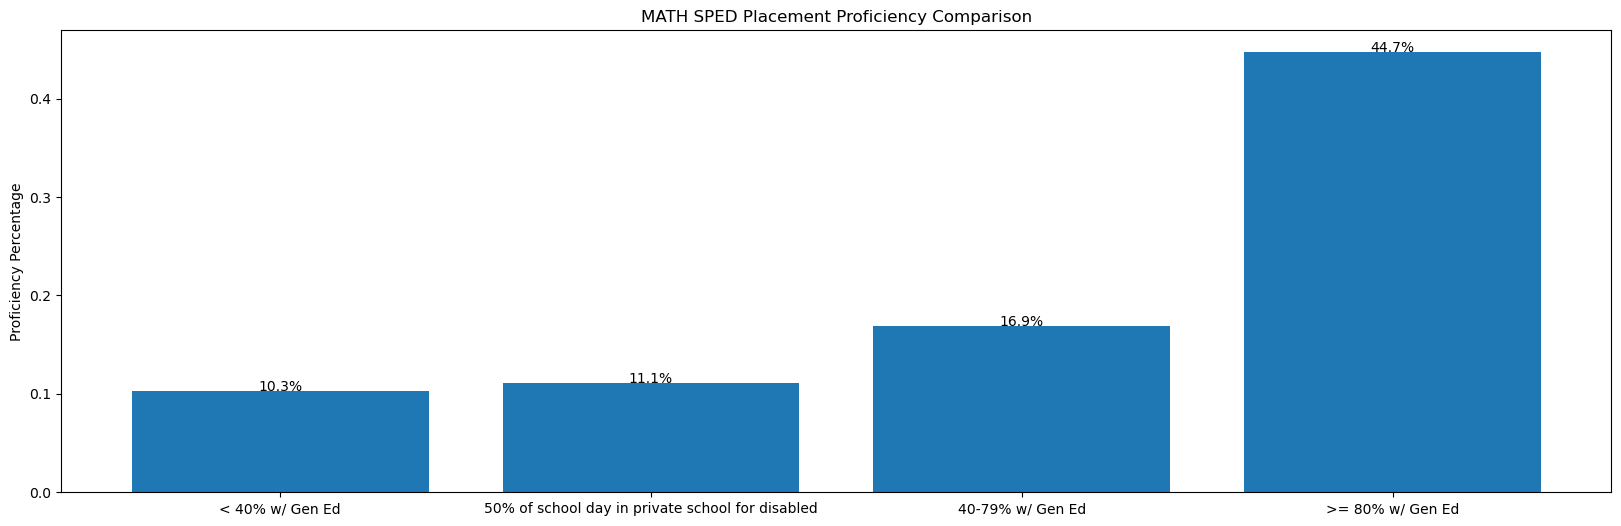

In [32]:
# plotting results SPED placement proficiency results
plt.figure(figsize = (20,6)) #--> creating figure

# plotting figure
plt.bar(x = 'SPED Placement Description', height = 'Proficiency %',data = sped_placement)

#labeling
plt.title(f"{subject} SPED Placement Proficiency Comparison") #--> title

# adding proficiency percentages
for i,v in enumerate(sped_placement['Proficiency %']):
    plt.text(i,v,f"{v:.1%}", ha = 'center')
    
plt.ylabel('Proficiency Percentage') #--> y-axis label

plt.show()

In [33]:
print('Student with an IEP that had a Special Education Placement code of 09, spending greater than or equal to 80% of the school day with their general education peers, had the highest proficiency percentage of students with an IEP')

Student with an IEP that had a Special Education Placement code of 09, spending greater than or equal to 80% of the school day with their general education peers, had the highest proficiency percentage of students with an IEP


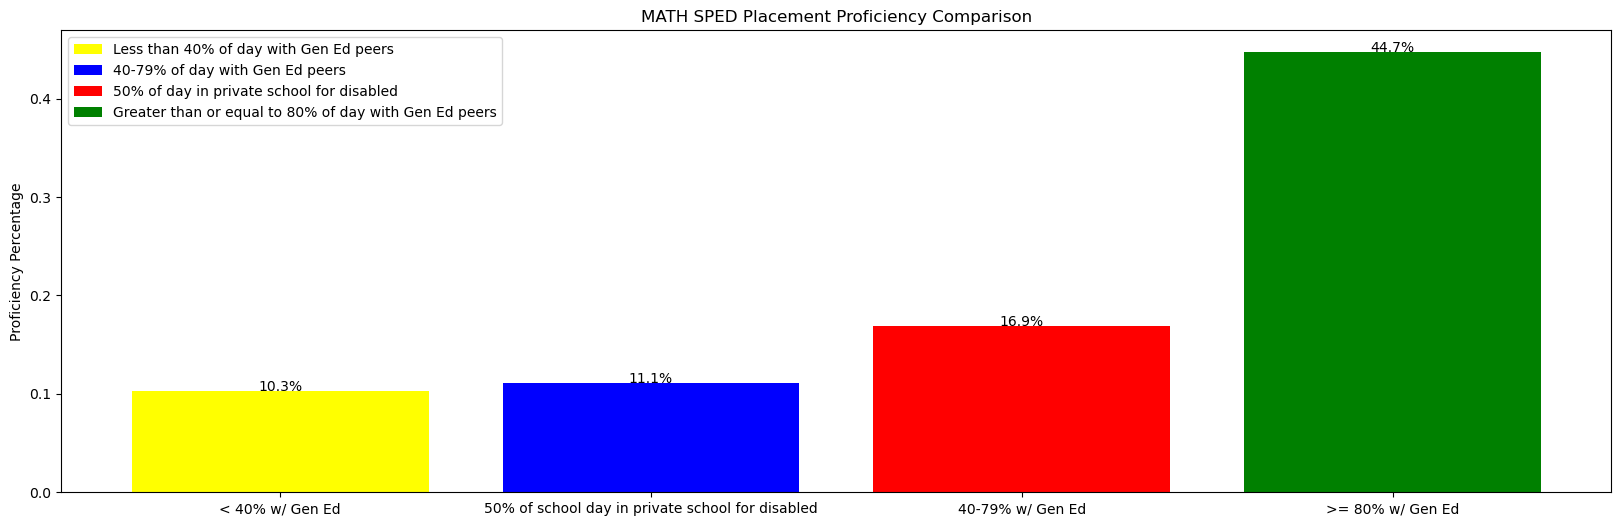

In [34]:
# plotting results SPED placement proficiency results
plt.figure(figsize = (20,6)) #--> creating figure

# plotting figure
plt.bar(x = 'SPED Placement Description', height = 'Proficiency %',data = sped_placement, color = ['yellow','blue','red','green'], 
        label = ['Less than 40% of day with Gen Ed peers','40-79% of day with Gen Ed peers','50% of day in private school for disabled',
                 'Greater than or equal to 80% of day with Gen Ed peers'])
# plt.text(1,.4,'Students in 50% of school day in private school for disabled are OOD placments ')

#labeling
plt.title(f"{subject} SPED Placement Proficiency Comparison") #--> title
plt.legend() #--> an underscore in front the label means it will be excluded

# adding proficiency percentages
for i,v in enumerate(sped_placement['Proficiency %']):
    plt.text(i,v,f"{v:.1%}", ha = 'center')
    
plt.ylabel('Proficiency Percentage') #--> y-axis label

plt.show()

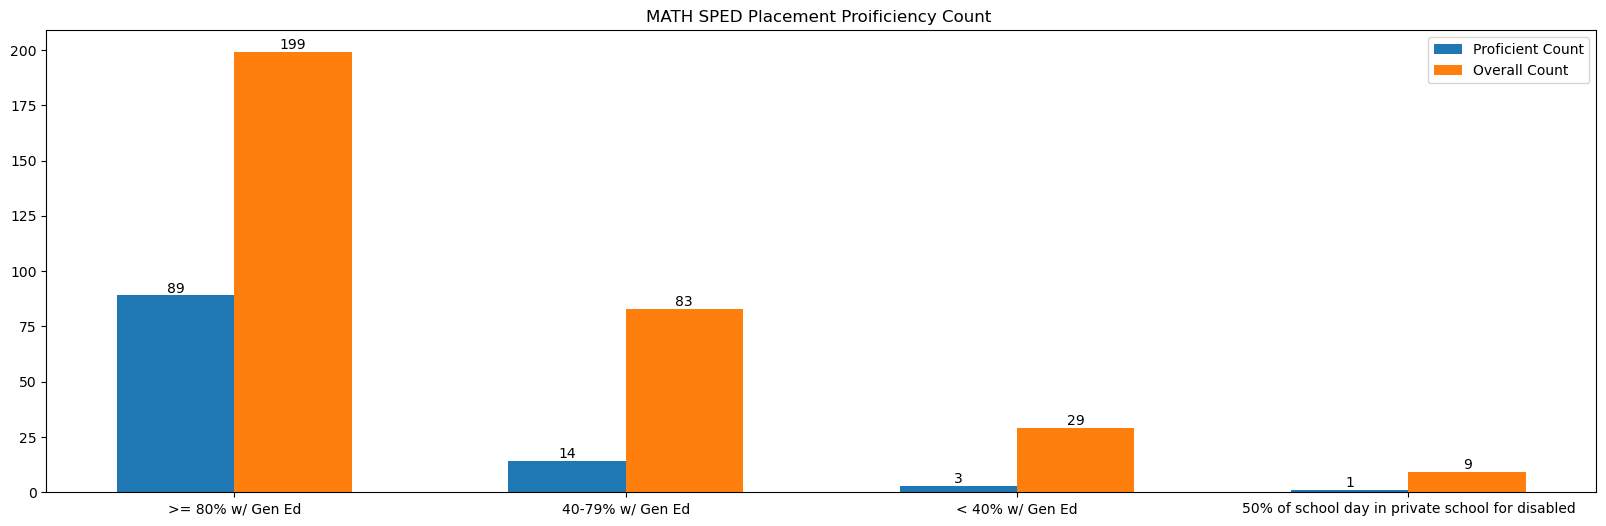

In [35]:
# creating grouped bar chart
labels = ovr_ct['SPED Placement Description'].to_list() #--> labels
overall_ct = ovr_ct['ovr_count'].to_list()
proficient_ct = sped_proficient_ct['proficient_count'].to_list()

# label locations
x = np.arange(len(labels)) #--> label locations
width = 0.30

# creating subplot
fig,ax = plt.subplots(figsize = (20,6))

#plotting data
rects1 = ax.bar(x-width/2, proficient_ct,width, label = 'Proficient Count') #--> plotting one  bar that is half the width of the bar at an off center position
rects2 = ax.bar(x+width/2, overall_ct, width, label = 'Overall Count')


ax.bar_label(rects1) #--> adding labels to bar graph
ax.bar_label(rects2) #--> adding labels to bar graph

ax.set_title(f'{subject} SPED Placement Proificiency Count ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [36]:
df_math[df_math['StudentWithDisabilities']=='IEP']['TestScaleScore'].describe()

count    321.000000
mean     734.866044
std       33.858402
min      650.000000
25%      710.000000
50%      735.000000
75%      759.000000
max      834.000000
Name: TestScaleScore, dtype: float64

In [37]:
df_math[df_math['StudentWithDisabilities']=='IEP'].groupby('SpecialEducationPlacement')['TestScaleScore'].median()

SpecialEducationPlacement
9.0     745.0
10.0    716.0
11.0    704.0
13.0    711.0
Name: TestScaleScore, dtype: float64

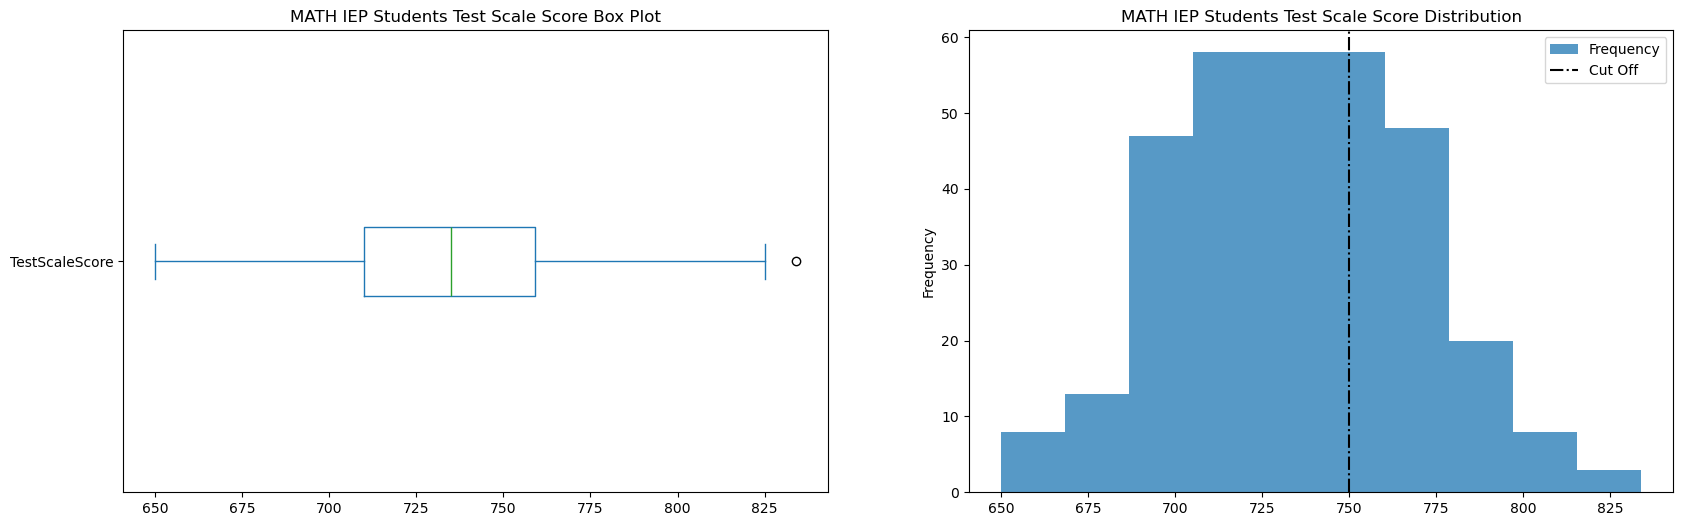

In [38]:
# calculating outliers
q1 = df_math[df_math['StudentWithDisabilities']=='IEP']['TestScaleScore'].quantile(.25)
q3 = df_math[df_math['StudentWithDisabilities']=='IEP']['TestScaleScore'].quantile(.75)
iqr = q3 - q1

outlier_upper = q3 + (1.5 * iqr)
outlier_lower = q1 - (1.5 * iqr)

# dataset for SPED outliers
sped_outlier = df_math[(df_math['StudentWithDisabilities']=='IEP') & (df_math['TestScaleScore']>= outlier_upper)|(df_math['TestScaleScore']<= outlier_lower)]

fig, ax = plt.subplots(ncols = 2, nrows = 1,figsize = (20,6))

# plotting histogram
df_math[df_math['StudentWithDisabilities']=='IEP']['TestScaleScore'].plot(kind = 'hist', title = f"{subject} IEP Students Test Scale Score Distribution",
                                                                        alpha = .75, ax = ax[1])

df_math[df_math['StudentWithDisabilities']=='IEP']['TestScaleScore'].plot(kind = 'box', vert = False,ax = ax[0],
                                                                        title = f"{subject} IEP Students Test Scale Score Box Plot")

# adding vertical lines to plot
ax[1].axvline(x = 750, linestyle = '-.', color = 'black')


# legend
plt.legend(['Frequency','Cut Off'])

plt.show()

In [39]:
print(f"An outlier for a student with an IEP is a test scale score of less than or equal to {round(outlier_lower)} or a test scale score greater than or equalt to {round(outlier_upper)}.",
     f"There is {sped_outlier.shape[0]} outlier in the dataset with a test scale score of {sped_outlier['TestScaleScore'].iloc[0]}",
f" and a special education placement code of {sped_outlier['SpecialEducationPlacement'].iloc[0]}, meaning the student spends greater than or equal to 80% in the presence of their general education peers.")

An outlier for a student with an IEP is a test scale score of less than or equal to 636 or a test scale score greater than or equalt to 832. There is 1 outlier in the dataset with a test scale score of 834.0  and a special education placement code of 9.0, meaning the student spends greater than or equal to 80% in the presence of their general education peers.
